# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [ ]:
# Start your codes here!
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = "https://raw.githubusercontent.com/SNAKE169/CoderSchoolweek4/master/google-play-store.csv"

In [ ]:
data = pd.read_csv(url)

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
### Xử lý data

cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]

In [ ]:
print(cols_with_missing)

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']


In [ ]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

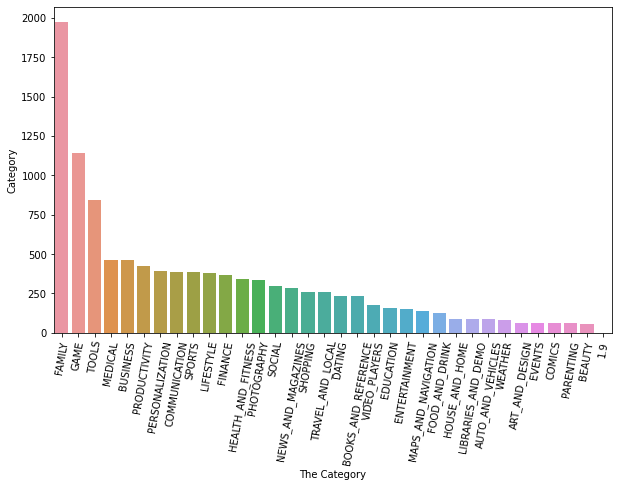

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=80)
plt.xlabel("The Category")
plt.ylabel("The number of the category")
sns.barplot(x = data['Category'].value_counts().index, y = data['Category'].value_counts())
#qua hình bên dưới ta thấy Family, Game, Tools là 3 category phổ biến nhất

In [ ]:
avg_app_rating =data['Rating'].mean()
print(avg_app_rating)

4.193338315362448


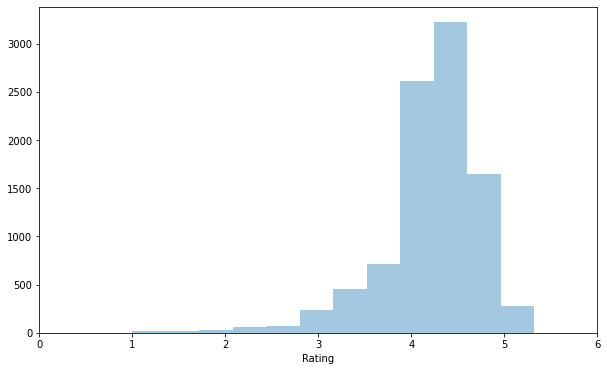

In [ ]:
plt.figure(figsize=(10,6))
plt.xlim(0, 6)
sns.distplot(a=data['Rating'], kde=False)
#histogram của Rating

In [ ]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
data['Reviews'] = data.Reviews.replace("0.0",0)
data['Reviews'] = data.Reviews.replace("3.0M",3000000.0)
data['Reviews'] = data['Reviews'].astype(float)
data['Reviews'].dtype

dtype('float64')

In [ ]:
data['Size'] = data.Size.replace("Varies with device",np.nan)
data['Size'] = data.Size.str.replace("M","000") # All size values became the kilobyte type.
data['Size'] = data.Size.str.replace("k","")
data['Size'] = data.Size.replace("1,000+",1000)
data['Size'] =data['Size'].astype(float)
data['Size'].dtype

dtype('float64')

In [ ]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
data['Installs'] = data['Installs'].apply(lambda x : x.replace('+',''))
data['Installs'] = data['Installs'].apply(lambda x : x.replace (',',''))
data['Installs'] = data.Installs.replace("Free",np.nan)
data['Installs'] = data['Installs'].astype(float)

In [ ]:
data['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

In [ ]:
data['Price'] = data.Price.replace("Everyone","0")
data['Price'] = data.Price.str.replace("$","").astype(float)
data['Price'].dtype

dtype('float64')

In [ ]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067645,0.075741,0.051355,-0.021176
Reviews,0.067645,1.000000,0.233615,0.643122,-0.009672
Size,0.075741,0.233615,1.000000,0.164608,-0.022766
Installs,0.051355,0.643122,0.164608,1.000000,-0.011689
Price,-0.021176,-0.009672,-0.022766,-0.011689,1.000000


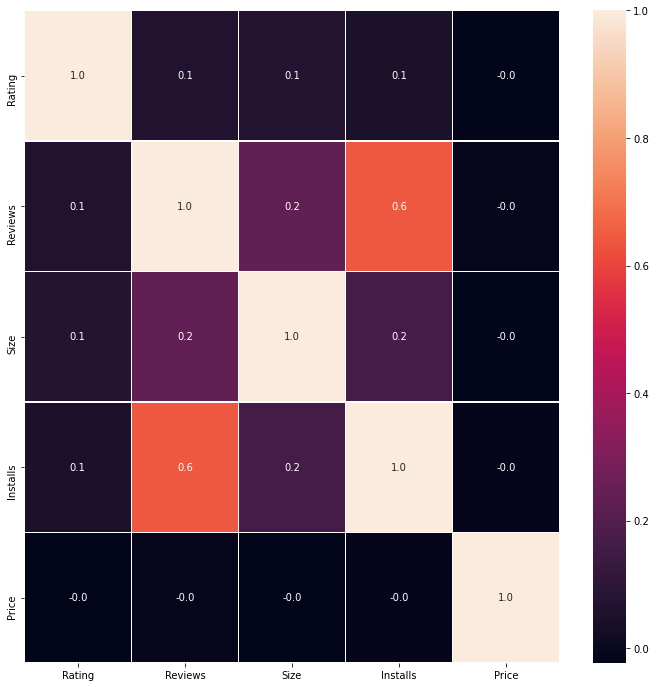

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, linewidths=.5,fmt= '.1f',ax=ax)
plt.show()
#ta thấy app nào có nhiều reviews thì sẽ có nhiều install

In [ ]:
copy_dataset = data.copy()

In [ ]:
#reduce the genres to one simple Genres
copy_dataset['Genres'] = copy_dataset['Genres'].apply(lambda x : x.split(";")[0])
copy_dataset['Genres'].value_counts()

Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventure                   91
House & 

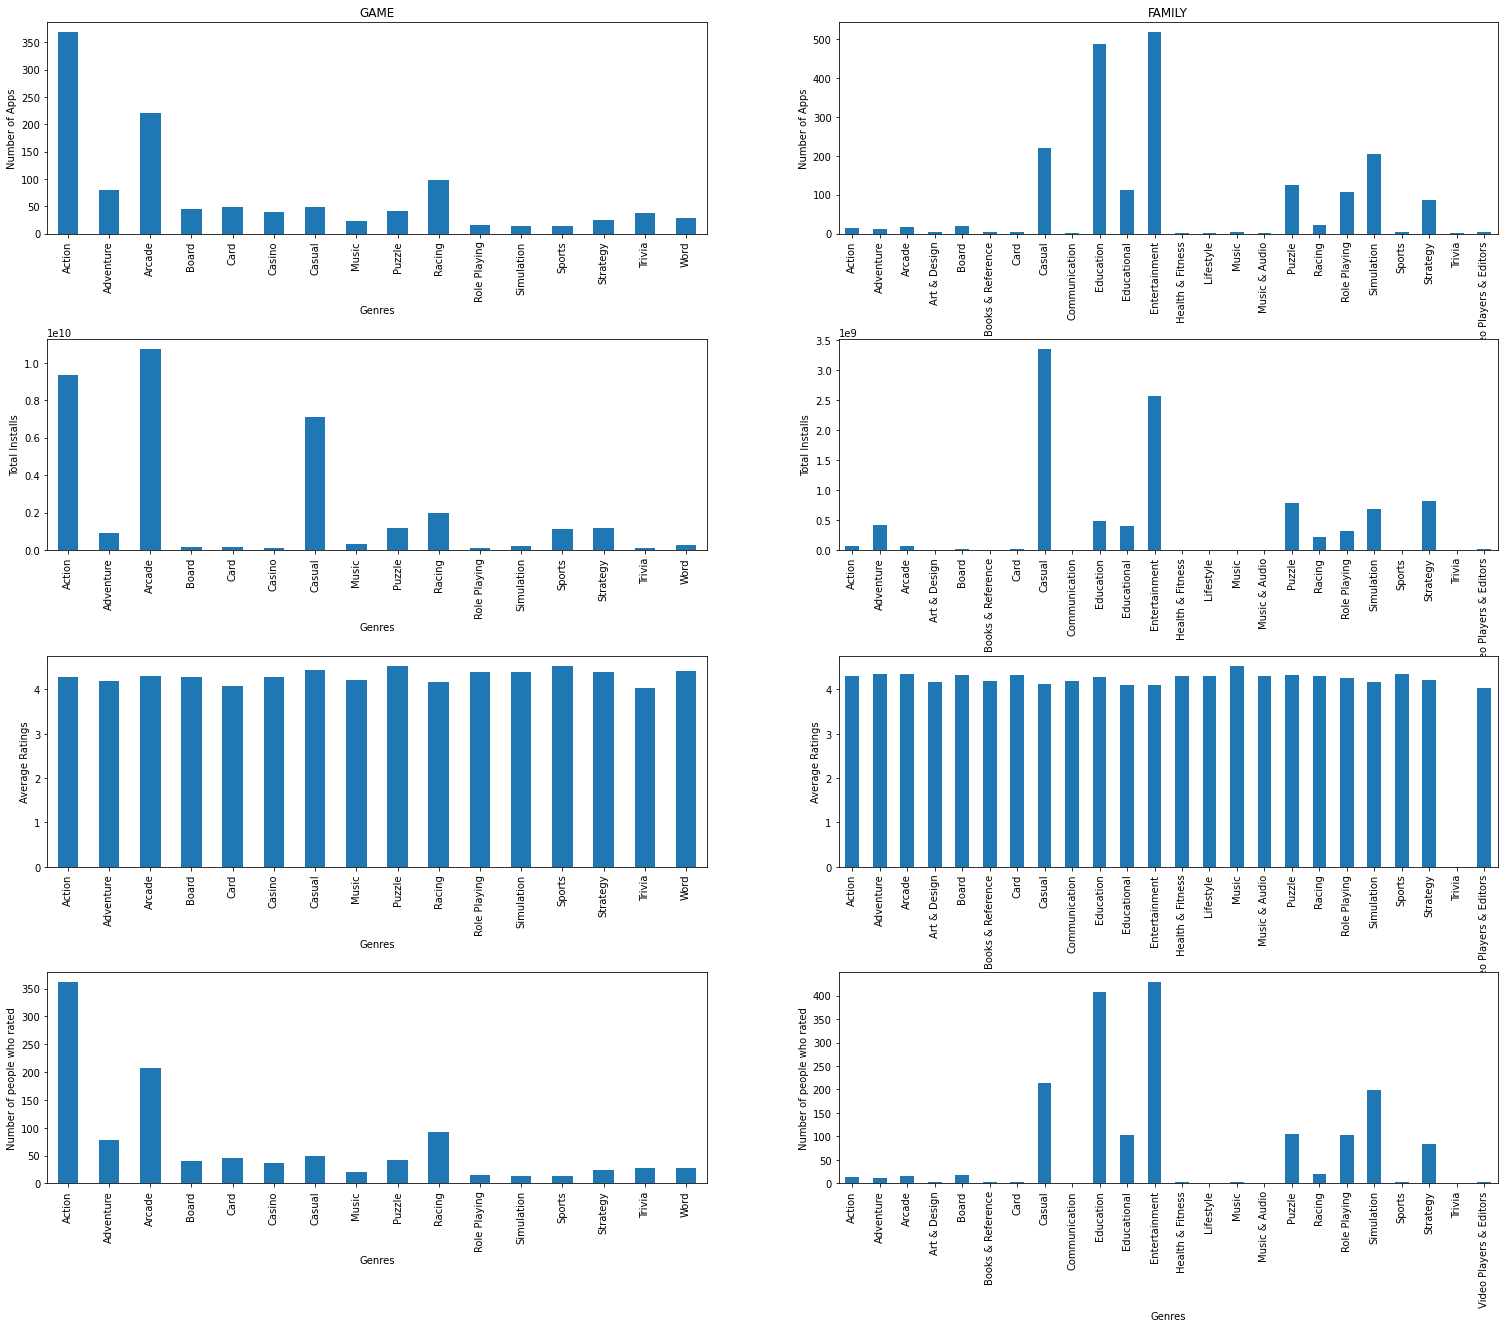

In [ ]:
# Ở trên ta biết đc 2 thể loại phổ biến nhất là GAME, Family. 
# ta sẽ xem thử qua với mỗi thể loại thì genre nào là đc install nhiều, rate nhiều
fig, axarr = plt.subplots(4, 2, figsize=(26, 15))
plt.subplots_adjust(top=1.2, hspace=0.5)

for i,col in enumerate(['GAME','FAMILY']):
    axarr[0][i].set_title(col)
    axarr[0][i].set(ylabel = 'Number of Apps' )
    axarr[1][i].set(ylabel = 'Total Installs')
    axarr[2][i].set(ylabel = 'Average Ratings')
    axarr[3][i].set(ylabel = 'Number of people who rated')
    copy_dataset[copy_dataset['Category'] == col].groupby('Genres')['Installs'].count().plot.bar(ax = axarr[0][i])
    copy_dataset[copy_dataset['Category'] == col].groupby('Genres')['Installs'].sum().plot.bar(ax = axarr[1][i])    
    copy_dataset[copy_dataset['Category'] == col].groupby('Genres')['Rating'].mean().plot.bar(ax = axarr[2][i])
    copy_dataset[copy_dataset['Category'] == col].groupby('Genres')['Rating'].count().plot.bar(ax = axarr[3][i])

In [ ]:
''' qua biểu đồ trên ta thấy với "GAME"
** Action là thể loại có nhiều app nhất và cũng có lượt tải thứ nhì trong tổng số lượt tải của GAME
trung bình đánh giá cũng khá cao tầm 4.3 , có lượng người đánh giá cao nhất trong category "GAME"
** Arcade đứng thứ nhì về số lượng app nhưng lại có lượt tải cao nhất
có đánh giá khá cao tầm 4.5
** Racing đứng thứ 3 trong tổng số Apps trên play store
Nhưng lại đứng thứ 4 trong tổng số Installs, ở sau Casual.
Điểm rating khá là kém so với các thể loại khác trong Games
'''

' qua biểu đồ trên ta thấy với "GAME"\n** Action là thể loại có nhiều app nhất và cũng có lượt tải thứ nhì trong tổng số lượt tải của GAME\ntrung bình đánh giá cũng khá cao tầm 4.3 , có lượng người đánh giá cao nhất trong category "GAME"\n** Arcade đứng thứ nhì về số lượng app nhưng lại có lượt tải cao nhất\ncó đánh giá khá cao tầm 4.5\n** Racing đứng thứ 3 trong tổng số Apps trên play store\nNhưng lại đứng thứ 4 trong tổng số Installs, ở sau Casual.\nĐiểm rating khá là kém so với các thể loại khác trong Games\n'

In [ ]:
''' còn đối với "FAmily"
** Entertainment là thể loại có nhiều app nhất và cũng có lượt tải thứ nhì trong tổng số lượt tải của Family
trung bình đánh giá cũng khá cao tầm 4.0 , có lượng người đánh giá cao nhất trong category "family"
** Education đứng thứ nhì về số lượng app nhưng lại có lượt tải khá thấp mặc dù vậy 
điểm rating cũng khá tốt mặc dù có rất nhiều người rate
** Casual đứng thứ 3 trong tổng số Apps trên play store
Nhưng lại đứng thứ 1 trong tổng số Installs.
Điểm rating tầm 4.0 nhưng mà số người rate khá ít
'''

' còn đối với "FAmily"\n** Entertainment là thể loại có nhiều app nhất và cũng có lượt tải thứ nhì trong tổng số lượt tải của Family\ntrung bình đánh giá cũng khá cao tầm 4.0 , có lượng người đánh giá cao nhất trong category "family"\n** Education đứng thứ nhì về số lượng app nhưng lại có lượt tải khá thấp mặc dù vậy \nđiểm rating cũng khá tốt mặc dù có rất nhiều người rate\n** Casual đứng thứ 3 trong tổng số Apps trên play store\nNhưng lại đứng thứ 1 trong tổng số Installs.\nĐiểm rating tầm 4.0 nhưng mà số người rate khá ít\n'

In [ ]:
'''
Qua đây ta thấy là Casual là thể loại mà ở cả 2 category có lượng install khá tốt do đó nếu làm thì ta nên làm về thể loại này.
còn về Education thì ta không nên làm vì có lượng tải khá ít cho dù có rất nhiều app
thể loại adventure ở bên Family khá tốt, nên nếu làm thì ta nên làm adventure với category "Family" hơn là "GAME"
'''

'\nQua đây ta thấy là Casual là thể loại mà ở cả 2 category có lượng install khá tốt do đó nếu làm thì ta nên làm về thể loại này.\ncòn về Education thì ta không nên làm vì có lượng tải khá ít cho dù có rất nhiều app\nthể loại adventure ở bên Family khá tốt, nên nếu làm thì ta nên làm adventure với category "Family" hơn là "GAME"\n'